In [11]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    Dense,
    Flatten,
    Dropout,
    GlobalMaxPooling2D
)

In [7]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [8]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [9]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [10]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 59s 37ms/step - loss: 1.5678 - accuracy: 0.4254 - val_loss: 1.2741 - val_accuracy: 0.5377
Epoch 2/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.2784 - accuracy: 0.5409 - val_loss: 1.1201 - val_accuracy: 0.5964
Epoch 3/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1494 - accuracy: 0.5874 - val_loss: 1.0362 - val_accuracy: 0.6295
Epoch 4/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0513 - accuracy: 0.6255 - val_loss: 1.0033 - val_accuracy: 0.6457
Epoch 5/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9819 - accuracy: 0.6501 - val_loss: 0.9580 - val_accuracy: 0.6598
Epoch 6/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9207 - accuracy: 0.6715 - val_loss: 0.9230 - val_accuracy: 0.6750
Epoch 7/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8694 - accuracy: 0.6905 - val_loss: 0.9115 -

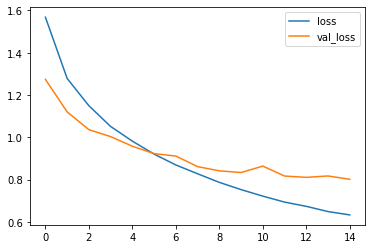

In [13]:
# Plot loss per interation
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

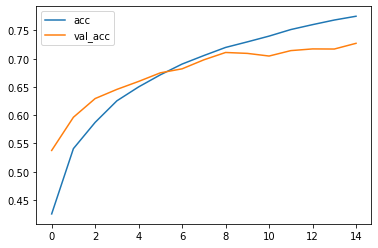

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 4s 12ms/step
Confusion matrix, without normalization
[[749  28  49  20  17  12  14  17  69  25]
 [ 12 877   5   4   4   8  13   2  24  51]
 [ 50   5 629  57  79  49  73  39  11   8]
 [ 11  10  78 479  54 216  85  43  10  14]
 [ 23   4  83  48 663  48  62  61   7   1]
 [  8   4  48 163  39 643  34  52   3   6]
 [  1   8  22  34  31  41 845  10   6   2]
 [  9   5  29  37  42  55  11 805   2   5]
 [ 37  38  11  21   9  11   8   6 829  30]
 [ 31 121  12  15   1   8  14  20  25 753]]


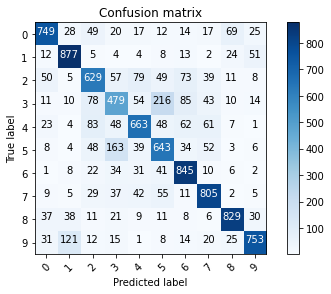

In [15]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`
  """
  if normalize:
    cm = cm.astype("foat") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = ".2f" if normalize else "d"
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [16]:
# Label mapping
labels = [
    'airplane', 
    'automobile', 
    'bird', 
    'cat', 
    'deer', 
    'dog', 
    'frog', 
    'horse', 
    'ship',
    'truck'
]

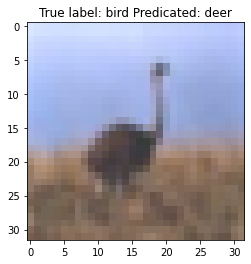

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
_ = plt.title("True label: %s Predicated: %s" % (labels[y_test[i]], labels[p_test[i]]))